<a href="https://colab.research.google.com/github/jiayuankeliang/309CourseWork2/blob/main/309CourseWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firstly, you must ensure your location is in the same level as 'data' floder

In [1]:
%cd /content/drive/MyDrive/Github/309CourseWork2

/content/drive/MyDrive/Github/309CourseWork2


import moudle

In [2]:
import os
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from concurrent.futures import ThreadPoolExecutor,as_completed

load meat data

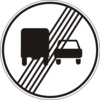

In [3]:
meta = {}
for file_name in os.listdir('/content/drive/MyDrive/Github/309CourseWork2/data/meta'):
  key = file_name.replace('.png', '')
  meta[int(key)] = Image.open(os.path.join('/content/drive/MyDrive/Github/309CourseWork2/data/meta', file_name))

meta[42]

load data from .npy file and check shape(save train data as .npy files in personal computer)

In [4]:
X_train = np.load('/content/drive/MyDrive/Github/309CourseWork2/data/X_train.npy')
Y_train = np.load('/content/drive/MyDrive/Github/309CourseWork2/data/Y_train.npy')
X_train.shape, Y_train.shape

((39209, 32, 32, 3), (39209,))

feature scale

In [5]:
X_train = X_train/255

show image

label and sample


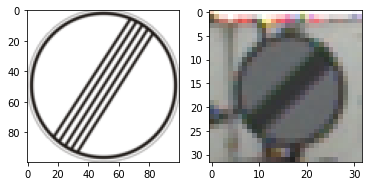

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
index = 39208
print('label and sample')
ax1.imshow(meta[Y_train[index]])
ax2.imshow(X_train[index])

check GPU available

In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


start with a simple model

In [8]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(43, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit(X_train, Y_train, epochs = 100, validation_split=0.1, callbacks=[early_stopping_cb])

Epoch 1/100
1103/1103 [==============================] - 9s 5ms/step - loss: 2.5045 - accuracy: 0.3888 - val_loss: 9.4639 - val_accuracy: 0.0474
Epoch 2/100
1103/1103 [==============================] - 4s 4ms/step - loss: 1.3621 - accuracy: 0.6521 - val_loss: 12.3548 - val_accuracy: 0.0638
Epoch 3/100
1103/1103 [==============================] - 4s 4ms/step - loss: 0.9076 - accuracy: 0.7711 - val_loss: 15.5185 - val_accuracy: 0.1265
Epoch 4/100
1103/1103 [==============================] - 5s 5ms/step - loss: 0.6910 - accuracy: 0.8309 - val_loss: 17.6335 - val_accuracy: 0.1375
Epoch 5/100
1103/1103 [==============================] - 4s 4ms/step - loss: 0.5638 - accuracy: 0.8657 - val_loss: 19.6057 - val_accuracy: 0.1584
Epoch 6/100
1103/1103 [==============================] - 4s 4ms/step - loss: 0.4788 - accuracy: 0.8866 - val_loss: 20.6978 - val_accuracy: 0.1512
Epoch 7/100
1103/1103 [==============================] - 5s 5ms/step - loss: 0.4225 - accuracy: 0.8997 - val_loss: 22.6435 - 

train acc/loss and val acc/loss

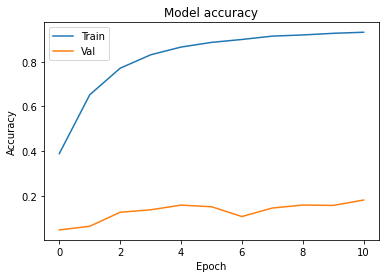

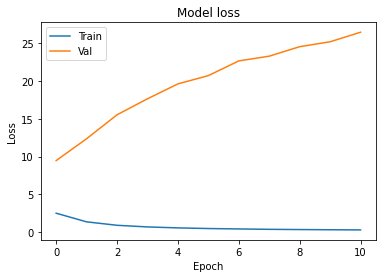

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

overfitting